In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start = '2014-01-01'
end = '2024-12-21'
stock = 'WIT'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
data.reset_index(inplace=True)

In [4]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,6.235,6.250,6.110,6.165,5.789351,440800
1,2014-01-03,6.205,6.345,6.195,6.325,5.939603,1078200
2,2014-01-06,6.345,6.345,6.120,6.190,5.812828,2801200
3,2014-01-07,6.210,6.275,6.140,6.170,5.794046,2304600
4,2014-01-08,6.130,6.225,6.130,6.215,5.836305,1551000
...,...,...,...,...,...,...,...
2534,2024-01-29,5.750,5.750,5.680,5.730,5.730000,1495200
2535,2024-01-30,5.700,5.710,5.610,5.650,5.650000,1939400
2536,2024-01-31,5.690,5.740,5.660,5.660,5.660000,2248600
2537,2024-02-01,5.660,5.700,5.630,5.700,5.700000,1714400


In [5]:
ma_100_days = data.Close.rolling(100).mean() # taking moving avrage 100

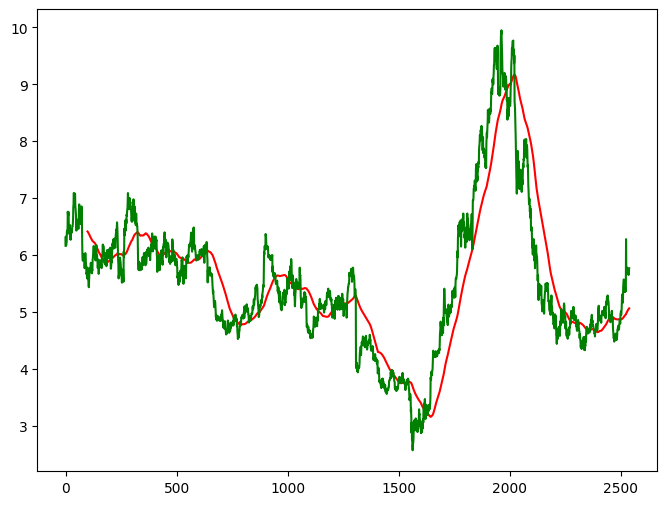

In [6]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [7]:
ma_200_days = data.Close.rolling(200).mean()

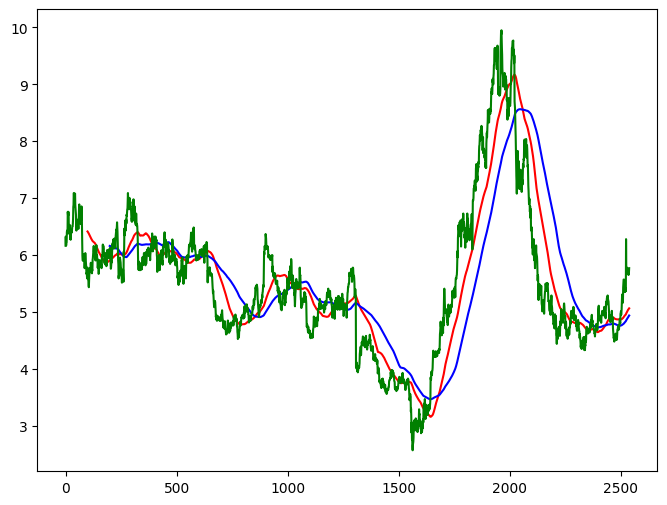

In [8]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [9]:
data.dropna(inplace=True) # rmoving the null values

In [10]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)]) # deviding the data train and test data
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [11]:
data_train.shape[0]

2031

In [12]:
data_test.shape[0]

508

In [13]:
from sklearn.preprocessing import MinMaxScaler #use to fit our data in between 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))

In [14]:
data_train_scale = scaler.fit_transform(data_train) # for taking 100days data

In [15]:
x = [] #slicing opration
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [16]:
x, y = np.array(x), np.array(y)

In [17]:
from keras.layers import Dense, Dropout, LSTM # keras work like independent layer
from keras.models import Sequential

In [18]:
model = Sequential() # creating the 4 lstm layer the different number of nuarans
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,# relu is the one of the nuearl network
               input_shape = ((x.shape[1],1)))) #50nurans
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5)) #model will not be overfitted

model.add(Dense(units =1)) # only print a closing price

In [19]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [20]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1) # 50 tidmes our traing data push to the starting to ending 

Epoch 1/50

61/61 [==============================] - 11s 122ms/step - loss: 0.0324
Epoch 2/50
61/61 [==============================] - 7s 112ms/step - loss: 0.0071
Epoch 3/50
61/61 [==============================] - 7s 111ms/step - loss: 0.0077
Epoch 4/50
61/61 [==============================] - 7s 114ms/step - loss: 0.0070
Epoch 5/50
61/61 [==============================] - 7s 123ms/step - loss: 0.0059
Epoch 6/50
61/61 [==============================] - 8s 136ms/step - loss: 0.0053
Epoch 7/50
61/61 [==============================] - 10s 164ms/step - loss: 0.0060
Epoch 8/50
61/61 [==============================] - 11s 176ms/step - loss: 0.0050
Epoch 9/50
61/61 [==============================] - 9s 150ms/step - loss: 0.0048
Epoch 10/50
61/61 [==============================] - 8s 131ms/step - loss: 0.0053
Epoch 11/50
61/61 [==============================] - 8s 129ms/step - loss: 0.0044
Epoch 12/50
61/61 [==============================] - 8s 129ms/step - loss: 0.0037
Epoch 13/50
61/61 [==

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [22]:
pas_100_days = data_train.tail(100)

In [23]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [24]:
data_test

,Close
0,9.49
1,9.60
2,9.64
3,9.41
4,9.42
...,...
603,5.73
604,5.65
605,5.66
606,5.70


In [25]:
data_test_scale  =  scaler.fit_transform(data_test)

In [26]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [27]:
y_predict = model.predict(x)

16/16 [==============================] - 2s 55ms/step


In [28]:
y_predict

array([[0.6247569 ],
       [0.60174835],
       [0.57749224],
       [0.5570593 ],
       [0.5459007 ],
       [0.54434776],
       [0.5519494 ],
       [0.5649455 ],
       [0.579465  ],
       [0.5910667 ],
       [0.59812826],
       [0.6013366 ],
       [0.6003889 ],
       [0.5932672 ],
       [0.5784271 ],
       [0.56140155],
       [0.54691684],
       [0.5361211 ],
       [0.52882814],
       [0.5254221 ],
       [0.524944  ],
       [0.5249028 ],
       [0.5251316 ],
       [0.52494663],
       [0.52215827],
       [0.51790583],
       [0.5135696 ],
       [0.5101886 ],
       [0.5076218 ],
       [0.50703716],
       [0.50944525],
       [0.51503134],
       [0.5230044 ],
       [0.532945  ],
       [0.5439788 ],
       [0.55659735],
       [0.5707445 ],
       [0.58618975],
       [0.6010127 ],
       [0.6141347 ],
       [0.6236398 ],
       [0.62897897],
       [0.63024956],
       [0.6285274 ],
       [0.6263448 ],
       [0.623786  ],
       [0.61915654],
       [0.613

In [29]:
scale =1/scaler.scale_ #convert to the actual price
scale

array([5.61999989])

In [30]:
y_predict = y_predict*scale #predicted value

In [31]:
y = y*scale #actual value
y

array([2.98000002, 2.75      , 3.07999992, 3.36000013, 3.38999987,
       3.5       , 3.22000027, 3.26999998, 3.11000013, 3.21000004,
       3.32000017, 3.15999985, 2.95000029, 2.82999992, 3.13999987,
       3.11999989, 3.03000021, 3.        , 3.17000008, 3.03999996,
       2.8499999 , 3.0999999 , 2.96000004, 2.78000021, 2.99000025,
       2.97000027, 2.99000025, 2.90999985, 3.1500001 , 3.26999998,
       3.24000025, 3.21000004, 3.36000013, 3.34000015, 3.61999989,
       3.61000013, 3.69999981, 3.55000019, 3.67000008, 3.51999998,
       3.5999999 , 3.57000017, 3.59000015, 3.71000004, 3.51999998,
       3.38000011, 3.55999994, 3.5999999 , 3.53000021, 3.36999989,
       3.22000027, 3.25      , 3.03000021, 2.88000011, 2.80000019,
       2.67000008, 2.57000017, 2.61999989, 2.65999985, 2.53999996,
       2.43000031, 2.53000021, 2.38000011, 2.32000017, 2.48000002,
       2.11000013, 2.0999999 , 2.0999999 , 2.15999985, 2.01000023,
       1.90999985, 1.80000019, 1.88999987, 1.68000031, 1.88999

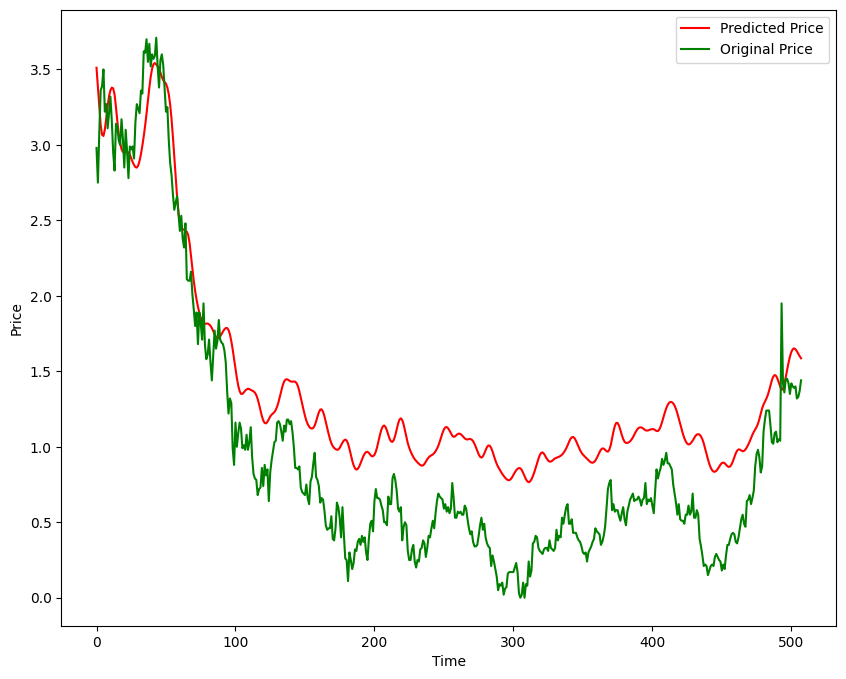

In [32]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [33]:
model.save('Stock Predictions Model.keras')

In [ ]:
##Arima Model

In [ ]:
#data = list(data["Close"])